#                     Simulation of World Cup 2014 Prediction

### 1. Import Library  and Define Function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer,StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
import sys 
import os
sys.path.append(os.path.abspath("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/fix/preprocessing_data"))
from preprocessing_data import preprocessingData
from preprocessing_data import preprocessingData_onehotencoder
from preprocessing_data import preprocessingData_pialadunia2018


Using TensorFlow backend.


In [2]:
def plot_accuracy_against_epoch(model):
    plt.plot(model.history['acc'], color="b",)
    plt.plot(model.history['val_acc'], color="g",)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
def plot_loss_against_epoch(model):
    plt.plot(model.history['loss'],color="b",)
    plt.plot(model.history['val_loss'],color="g",)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()


### 2. Calling Data 

In [3]:
world_cup_2014=pd.read_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_train/data_full_train_2018.csv", delimiter= ',') 
data_test_world_cup_2014 = pd.read_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_test/pertandingan_pialadunia_2018.csv", delimiter= ',')


## Data Preprocessing

In [4]:
independent_data_train,dependent_data_train= preprocessingData(world_cup_2014) 

[SoftImpute] Max Singular Value of X_init = 11161.378545
[SoftImpute] Iter 1: observed MAE=2.376298 rank=6
[SoftImpute] Iter 2: observed MAE=2.335569 rank=6
[SoftImpute] Iter 3: observed MAE=2.329309 rank=6
[SoftImpute] Iter 4: observed MAE=2.328860 rank=6
[SoftImpute] Iter 5: observed MAE=2.329382 rank=6
[SoftImpute] Iter 6: observed MAE=2.330093 rank=6
[SoftImpute] Iter 7: observed MAE=2.330821 rank=6
[SoftImpute] Iter 8: observed MAE=2.331544 rank=6
[SoftImpute] Iter 9: observed MAE=2.332257 rank=6
[SoftImpute] Iter 10: observed MAE=2.332959 rank=6
[SoftImpute] Iter 11: observed MAE=2.333654 rank=6
[SoftImpute] Iter 12: observed MAE=2.334338 rank=6
[SoftImpute] Iter 13: observed MAE=2.335020 rank=6
[SoftImpute] Iter 14: observed MAE=2.335707 rank=6
[SoftImpute] Iter 15: observed MAE=2.336408 rank=6
[SoftImpute] Iter 16: observed MAE=2.337134 rank=6
[SoftImpute] Iter 17: observed MAE=2.337882 rank=6
[SoftImpute] Iter 18: observed MAE=2.338658 rank=6
[SoftImpute] Iter 19: observed MAE

C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold
C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
print('dependentnya adalah',dependent_data_train.shape)

dependentnya adalah (2240, 1)


In [6]:
# independent_data_test,dependent_data_test = preprocessingData_pialadunia2018(data_test_world_cup_2014)
independent_data_test,dependent_data_test = preprocessingData(data_test_world_cup_2014)

[SoftImpute] Max Singular Value of X_init = 2009.288804
[SoftImpute] Iter 1: observed MAE=2.233286 rank=5
[SoftImpute] Iter 2: observed MAE=2.262620 rank=4
[SoftImpute] Iter 3: observed MAE=2.265678 rank=4
[SoftImpute] Iter 4: observed MAE=2.266838 rank=4
[SoftImpute] Iter 5: observed MAE=2.267274 rank=4
[SoftImpute] Iter 6: observed MAE=2.267432 rank=4
[SoftImpute] Iter 7: observed MAE=2.267471 rank=4
[SoftImpute] Iter 8: observed MAE=2.267473 rank=4
[SoftImpute] Iter 9: observed MAE=2.267451 rank=4
[SoftImpute] Iter 10: observed MAE=2.267422 rank=4
[SoftImpute] Iter 11: observed MAE=2.267394 rank=4
[SoftImpute] Iter 12: observed MAE=2.267370 rank=4
[SoftImpute] Iter 13: observed MAE=2.267353 rank=4
[SoftImpute] Iter 14: observed MAE=2.267342 rank=4
[SoftImpute] Iter 15: observed MAE=2.267334 rank=4
[SoftImpute] Iter 16: observed MAE=2.267327 rank=4
[SoftImpute] Iter 17: observed MAE=2.267322 rank=4
[SoftImpute] Iter 18: observed MAE=2.267318 rank=4
[SoftImpute] Iter 19: observed MAE=

C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold
C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
print("Independent data testnya adalah",independent_data_test.shape)

Independent data testnya adalah (64, 22)


In [8]:
print("Dependent data testnya adalah",dependent_data_test.shape)

Dependent data testnya adalah (64, 1)


In [9]:
attribut=['HTRF', 'THFP',
       'PHPAR', 'PHSPAR', 'PHPSAR', 'PHDAR', 'PHTSA', 'PHDBAR', 'PHAAR',
       'ATRF', 'TAFP', 'PAPAR', 'PASPAR', 'PAPSAR', 'PADAR', 'PATSA', 'PADBAR',
       'PAAAR']


In [10]:
# independent_data_train=independent_data_train[attribut]
dependent_data_train=preprocessingData_onehotencoder(dependent_data_train)

In [11]:
independent_data_test=independent_data_test[attribut]
dependent_data_test=preprocessingData_onehotencoder(dependent_data_test)
dependent_data_test.shape
print('ukuran X_tr',independent_data_train.shape)
print('ukuran Y_tr',dependent_data_train.shape)
print('ukuran X_val',independent_data_test.shape)
print('ukuran Y_val',dependent_data_test.shape)

ukuran X_tr (2240, 22)
ukuran Y_tr (2240, 3)
ukuran X_val (64, 18)
ukuran Y_val (64, 3)


In [12]:
X_tr, X_val, y_tr, y_val = train_test_split(independent_data_train, dependent_data_train, train_size = 0.8, test_size=0.2, random_state=0)

In [13]:
print('ukuran X_tr',X_tr.shape)
print('ukuran Y_tr',y_tr.shape)
print('ukuran X_val',X_val.shape)
print('ukuran Y_val',y_val.shape)

ukuran X_tr (1792, 22)
ukuran Y_tr (1792, 3)
ukuran X_val (448, 22)
ukuran Y_val (448, 3)


### Train Data to Model Algorithm

In [14]:
hidden_1 = 500
hidden_2 = 500
hidden_3 = 300
hidden_activation = 'relu'
output_activation = 'sigmoid'
epoch = 400
value_learning_rate = 0.01
opt=SGD(lr=value_learning_rate)

In [16]:
X_train=X_tr[attribut]
X_validation=X_val[attribut]
# y_tr=y_tr[attribut]
#y_val=y_val[attribut]
print('ukuran X_tr',X_train.shape)
print('ukuran Y_tr',y_tr.shape)
print('ukuran X_val',X_validation.shape)
print('ukuran Y_val',y_val.shape)

ukuran X_tr (1792, 18)
ukuran Y_tr (1792, 3)
ukuran X_val (448, 18)
ukuran Y_val (448, 3)


In [17]:
model = Sequential()
model.add(Dense(units=hidden_1, input_dim=X_train.shape[1], activation=hidden_activation,kernel_initializer='uniform'))
model.add(Dense(units=hidden_2, activation=hidden_activation,kernel_initializer='uniform'))
model.add(Dense(units=hidden_3, activation=hidden_activation,kernel_initializer='uniform'))
model.add(Dense(3, activation=output_activation))

In [18]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_DNN=model.fit(X_train, y_tr, epochs=epoch,  validation_data=(X_validation,y_val), batch_size=len(X_train))
scores = model.evaluate(X_train,y_tr)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Train on 1792 samples, validate on 448 samples
Epoch 1/400
1792/1792 [==============================] - 1s 341us/step - loss: 0.9631 - acc: 0.3493 - val_loss: 1.7791 - val_acc: 0.6399
Epoch 2/400
1792/1792 [==============================] - 0s 99us/step - loss: 1.7173 - acc: 0.6514 - val_loss: 0.8987 - val_acc: 0.6667
Epoch 3/400
1792/1792 [==============================] - 0s 104us/step - loss: 0.8811 - acc: 0.6667 - val_loss: 1.0538 - val_acc: 0.4874
Epoch 4/400
1792/1792 [==============================] - 0s 105us/step - loss: 1.0388 - acc: 0.4831 - val_loss: 1.3100 - val_acc: 0.6667
Epoch 5/400
1792/1792 [==============================] - 0s 105us/step - loss: 1.2900 - acc: 0.6667 - val_loss: 0.6985 - val_acc: 0.6399
Epoch 6/400
1792/1792 [==============================] - 0s 103us/step - loss: 0.6777 - acc: 0.6514 - val_loss: 0.6583 - val_acc: 0.6674
Epoch 7/400
1792/1792 [==============================] - 0s 103us/step - loss: 0.6633 - acc: 0.6652 - val_loss: 0.6462 - val_acc: 0.

Epoch 61/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.6075 - acc: 0.6676 - val_loss: 0.6106 - val_acc: 0.6741
Epoch 62/400
1792/1792 [==============================] - 0s 102us/step - loss: 0.6072 - acc: 0.6868 - val_loss: 0.6118 - val_acc: 0.6667
Epoch 63/400
1792/1792 [==============================] - 0s 95us/step - loss: 0.6071 - acc: 0.6676 - val_loss: 0.6102 - val_acc: 0.6786
Epoch 64/400
1792/1792 [==============================] - 0s 98us/step - loss: 0.6068 - acc: 0.6882 - val_loss: 0.6112 - val_acc: 0.6682
Epoch 65/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.6066 - acc: 0.6682 - val_loss: 0.6097 - val_acc: 0.6771
Epoch 66/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.6063 - acc: 0.6905 - val_loss: 0.6106 - val_acc: 0.6682
Epoch 67/400
1792/1792 [==============================] - 0s 97us/step - loss: 0.6060 - acc: 0.6689 - val_loss: 0.6093 - val_acc: 0.6808
Epoch 68/400
1792/1792 [================

Epoch 121/400
1792/1792 [==============================] - 0s 95us/step - loss: 0.6029 - acc: 0.6685 - val_loss: 0.6066 - val_acc: 0.6771
Epoch 122/400
1792/1792 [==============================] - 0s 95us/step - loss: 0.6029 - acc: 0.6888 - val_loss: 0.6060 - val_acc: 0.6704
Epoch 123/400
1792/1792 [==============================] - 0s 98us/step - loss: 0.6029 - acc: 0.6685 - val_loss: 0.6066 - val_acc: 0.6778
Epoch 124/400
1792/1792 [==============================] - 0s 94us/step - loss: 0.6030 - acc: 0.6888 - val_loss: 0.6058 - val_acc: 0.6682
Epoch 125/400
1792/1792 [==============================] - 0s 97us/step - loss: 0.6027 - acc: 0.6691 - val_loss: 0.6063 - val_acc: 0.6801
Epoch 126/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.6026 - acc: 0.6884 - val_loss: 0.6055 - val_acc: 0.6689
Epoch 127/400
1792/1792 [==============================] - 0s 97us/step - loss: 0.6025 - acc: 0.6691 - val_loss: 0.6062 - val_acc: 0.6801
Epoch 128/400
1792/1792 [=========

Epoch 181/400
1792/1792 [==============================] - 0s 104us/step - loss: 0.6000 - acc: 0.6704 - val_loss: 0.6035 - val_acc: 0.6815
Epoch 182/400
1792/1792 [==============================] - 0s 99us/step - loss: 0.5999 - acc: 0.6925 - val_loss: 0.6015 - val_acc: 0.6734
Epoch 183/400
1792/1792 [==============================] - 0s 114us/step - loss: 0.5997 - acc: 0.6717 - val_loss: 0.6035 - val_acc: 0.6815
Epoch 184/400
1792/1792 [==============================] - 0s 97us/step - loss: 0.6000 - acc: 0.6925 - val_loss: 0.6020 - val_acc: 0.6711
Epoch 185/400
1792/1792 [==============================] - 0s 94us/step - loss: 0.6001 - acc: 0.6702 - val_loss: 0.6038 - val_acc: 0.6763
Epoch 186/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.6004 - acc: 0.6884 - val_loss: 0.6023 - val_acc: 0.6704
Epoch 187/400
1792/1792 [==============================] - 0s 102us/step - loss: 0.6004 - acc: 0.6700 - val_loss: 0.6040 - val_acc: 0.6778
Epoch 188/400
1792/1792 [======

Epoch 241/400
1792/1792 [==============================] - 0s 98us/step - loss: 0.5982 - acc: 0.6721 - val_loss: 0.6021 - val_acc: 0.6786
Epoch 242/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.5982 - acc: 0.6899 - val_loss: 0.5989 - val_acc: 0.6734
Epoch 243/400
1792/1792 [==============================] - 0s 97us/step - loss: 0.5980 - acc: 0.6721 - val_loss: 0.6019 - val_acc: 0.6786
Epoch 244/400
1792/1792 [==============================] - 0s 95us/step - loss: 0.5980 - acc: 0.6903 - val_loss: 0.5989 - val_acc: 0.6726
Epoch 245/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.5980 - acc: 0.6715 - val_loss: 0.6019 - val_acc: 0.6793
Epoch 246/400
1792/1792 [==============================] - 0s 97us/step - loss: 0.5980 - acc: 0.6905 - val_loss: 0.5989 - val_acc: 0.6726
Epoch 247/400
1792/1792 [==============================] - 0s 95us/step - loss: 0.5979 - acc: 0.6715 - val_loss: 0.6016 - val_acc: 0.6808
Epoch 248/400
1792/1792 [=========

Epoch 301/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.5958 - acc: 0.6726 - val_loss: 0.6000 - val_acc: 0.6823
Epoch 302/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.5960 - acc: 0.6918 - val_loss: 0.5961 - val_acc: 0.6763
Epoch 303/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.5958 - acc: 0.6724 - val_loss: 0.5999 - val_acc: 0.6830
Epoch 304/400
1792/1792 [==============================] - 0s 102us/step - loss: 0.5959 - acc: 0.6920 - val_loss: 0.5960 - val_acc: 0.6756
Epoch 305/400
1792/1792 [==============================] - 0s 109us/step - loss: 0.5957 - acc: 0.6722 - val_loss: 0.5998 - val_acc: 0.6838
Epoch 306/400
1792/1792 [==============================] - 0s 96us/step - loss: 0.5959 - acc: 0.6920 - val_loss: 0.5959 - val_acc: 0.6763
Epoch 307/400
1792/1792 [==============================] - 0s 104us/step - loss: 0.5956 - acc: 0.6721 - val_loss: 0.5997 - val_acc: 0.6838
Epoch 308/400
1792/1792 [======

Epoch 361/400
1792/1792 [==============================] - 0s 97us/step - loss: 0.5940 - acc: 0.6752 - val_loss: 0.5983 - val_acc: 0.6845
Epoch 362/400
1792/1792 [==============================] - 0s 100us/step - loss: 0.5942 - acc: 0.6914 - val_loss: 0.5936 - val_acc: 0.6801
Epoch 363/400
1792/1792 [==============================] - 0s 157us/step - loss: 0.5939 - acc: 0.6752 - val_loss: 0.5982 - val_acc: 0.6845
Epoch 364/400
1792/1792 [==============================] - 0s 129us/step - loss: 0.5941 - acc: 0.6914 - val_loss: 0.5934 - val_acc: 0.6801
Epoch 365/400
1792/1792 [==============================] - 0s 105us/step - loss: 0.5938 - acc: 0.6752 - val_loss: 0.5982 - val_acc: 0.6845
Epoch 366/400
1792/1792 [==============================] - 0s 100us/step - loss: 0.5940 - acc: 0.6914 - val_loss: 0.5934 - val_acc: 0.6793
Epoch 367/400
1792/1792 [==============================] - 0s 100us/step - loss: 0.5938 - acc: 0.6750 - val_loss: 0.5982 - val_acc: 0.6845
Epoch 368/400
1792/1792 [===

In [19]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))


acc: 67.56%

loss: 59.32%


Save Model Train

In [20]:
model.save('C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/fix/Algoritma_DNN/model_train_dnn.pkl')


In [18]:
model.load_weights('C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/fix/Algoritma_DNN/model_train_dnn.pkl')
# model.load('C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/fix/Algoritma_DNN/model_train_dnn.pkl')


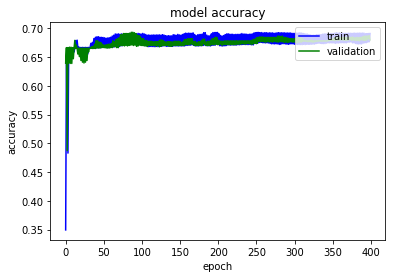

In [21]:
plot_accuracy_against_epoch(model_DNN)

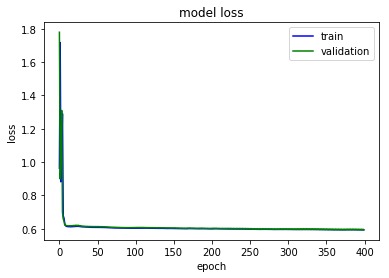

In [22]:
plot_loss_against_epoch(model_DNN)

### Test To Validation

In [23]:
pred_model_DNN_Val = model.predict(X_validation)
#independent_data_test.shape
pred_model_DNN_Val

array([[ 0.26758304,  0.25085124,  0.45988876],
       [ 0.33892092,  0.23408896,  0.40835688],
       [ 0.24238819,  0.24095765,  0.48665103],
       ..., 
       [ 0.31860226,  0.22449337,  0.41961369],
       [ 0.25579691,  0.29512072,  0.41583624],
       [ 0.33342052,  0.24882121,  0.3799558 ]], dtype=float32)

In [24]:
from sklearn.metrics import accuracy_score
for i in range (len(pred_model_DNN_Val)):
    maximum = max(pred_model_DNN_Val[i])
    for j in range (len(pred_model_DNN_Val[i])):
        if(pred_model_DNN_Val[i][j]==maximum):
            pred_model_DNN_Val[i][j]=1
        else:
            pred_model_DNN_Val[i][j]=0

In [25]:
print('Akurasinya adalah ', accuracy_score(y_val,pred_model_DNN_Val))

Akurasinya adalah  0.540178571429


In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, pred_model_DNN_Val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, pred_model_DNN_Val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, pred_model_DNN_Val)))  

Mean Absolute Error: 0.306547619048
Mean Squared Error: 0.306547619048
Root Mean Squared Error: 0.553667426392


In [27]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_val, pred_model_DNN_Val))  

             precision    recall  f1-score   support

          0       0.52      0.52      0.52       124
          1       0.00      0.00      0.00       118
          2       0.55      0.86      0.67       206

avg / total       0.40      0.54      0.45       448



C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
pred=[]
y_validation=[]

In [29]:
for a in pred_model_DNN_Val:
    if a[0]== 1:
        pred.append("Away Win")
    if a[1]== 1:
        pred.append("Draw")
    if a[2]== 1:
        pred.append("Home Win")
        

In [30]:
for a in y_val:
    if a[0]== 1:
        y_validation.append("Away Win")
    if a[1]== 1:
        y_validation.append("Draw")
    if a[2]== 1:
        y_validation.append("Home Win")


### Predict Data Test to Model Train

In [31]:
pred_model_DNN = model.predict(independent_data_test)
#independent_data_test.shape
pred_model_DNN = pd.DataFrame(pred_model_DNN,columns=["Away Win","Draw","Home Win"])
pred_model_DNN
data_test_world_cup_2014=pd.concat([data_test_world_cup_2014,pred_model_DNN],axis=1)
data_test_world_cup_2014

,home_team,away_team,home_score,away_score,Hasil,HTRF,THFP,PHPAR,PHSPAR,PHPSAR,...,PAPAR,PASPAR,PAPSAR,PADAR,PATSA,PADBAR,PAAAR,Away Win,Draw,Home Win
0,Russia,Saudi Arabia,5,0,Home_Win,66.000000,10.000000,72.0,74.0,74.0,...,66.0,60.0,70.0,61.0,76.0,67.0,29.0,0.164225,0.303791,0.481780
1,Egypt,Uruguay,0,1,Away_Win,46.000000,2.000000,69.0,61.0,72.0,...,72.0,65.0,77.0,68.0,76.0,72.0,29.0,0.431276,0.224130,0.346164
2,Russia,Egypt,3,1,Home_Win,66.000000,10.000000,72.0,74.0,74.0,...,69.0,61.0,72.0,65.0,73.0,67.0,28.0,0.224257,0.258410,0.469011
3,Uruguay,Saudi Arabia,1,0,Home_Win,67.000000,4.000000,66.0,60.0,70.0,...,72.0,65.0,77.0,68.0,76.0,72.0,29.0,0.478524,0.212364,0.313090
4,Uruguay,Russia,3,0,Home_Win,17.000000,12.000000,72.0,65.0,77.0,...,72.0,74.0,74.0,67.0,73.0,69.0,28.0,0.242701,0.278404,0.417984
5,Saudi Arabia,Egypt,2,1,Home_Win,67.000000,4.000000,66.0,60.0,70.0,...,69.0,61.0,72.0,65.0,73.0,67.0,28.0,0.256387,0.295130,0.433187
6,Portugal,Spain,3,3,Draw,4.000000,6.000000,75.0,64.0,76.0,...,81.0,68.0,75.0,71.0,76.0,77.0,28.0,0.397327,0.232607,0.349545
7,Maroko,Iran,0,1,Away_Win,22.571445,4.000000,72.0,65.0,75.0,...,69.0,63.0,73.0,64.0,73.0,69.0,30.0,0.266537,0.245716,0.463949
8,Portugal,Maroko,1,0,Home_Win,4.000000,6.000000,75.0,64.0,76.0,...,72.0,65.0,75.0,61.0,74.0,73.0,28.0,0.239127,0.232193,0.510122
9,Iran,Spain,0,1,Away_Win,36.000000,4.000000,69.0,63.0,73.0,...,81.0,68.0,75.0,71.0,76.0,77.0,28.0,0.551549,0.216030,0.258372


### Babak Penyisihan

In [54]:
att=['HTRF', 'THFP',
       'PHPAR', 'PHSPAR', 'PHPSAR', 'PHDAR', 'PHTSA', 'PHDBAR', 'PHAAR',
       'ATRF', 'TAFP', 'PAPAR', 'PASPAR', 'PAPSAR', 'PADAR', 'PATSA', 'PADBAR',
       'PAAAR']
X_val=X_val[att]


Penyisihan

In [55]:
pred_model_DNN_Test = model.predict(independent_data_test)
#independent_data_test.shape
pred_model_DNN_Test=np.round(pred_model_DNN_Test,2)*100


In [56]:
model_pred=pd.DataFrame(pred_model_DNN_Test,columns=["Away Win","Draw","Home Win"])
model_pred.to_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_test/hasil_prediksi_persentasi.csv")        


In [57]:
from sklearn.metrics import accuracy_score
for i in range (len(pred_model_DNN_Test)):
    maximum = max(pred_model_DNN_Test[i])
    for j in range (len(pred_model_DNN_Test[i])):
        if(pred_model_DNN_Test[i][j]==maximum):
            pred_model_DNN_Test[i][j]=1
        else:
            pred_model_DNN_Test[i][j]=0

In [58]:
print('Akurasinya adalah ', accuracy_score(dependent_data_test,pred_model_DNN_Test))

Akurasinya adalah  0.59375


In [59]:
pred_test=[]
pred_test_binary=[]

In [60]:
for a in pred_model_DNN_Test:
    if a[0]== 1:
        pred_test.append("Away Win")
    if a[1]== 1:
        pred_test.append("Draw")
    if a[2]== 1:
        pred_test.append("Home Win")

In [61]:
for a in pred_model_DNN_Test:
    if a[0]== 1:
        pred_test_binary.append(0)
    if a[1]== 1:
        pred_test_binary.append(1)
    if a[2]== 1:
        pred_test_binary.append(2)

In [62]:
tampan=pd.DataFrame(pred_test,columns=["Hasil"])
tampan.to_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_test/hasil_penyisihan.csv")

In [63]:
tampan2=pd.DataFrame(pred_test_binary,columns=["Hasil Prediksi"])
tampan2.to_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_test/hasil_penyisihan_binary.csv")

In [64]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(dependent_data_test, pred_model_DNN_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(dependent_data_test, pred_model_DNN_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dependent_data_test, pred_model_DNN_Test)))  

Mean Absolute Error: 0.270833333333
Mean Squared Error: 0.270833333333
Root Mean Squared Error: 0.520416499867


In [65]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(dependent_data_test, pred_model_DNN_Test))  

             precision    recall  f1-score   support

          0       0.67      0.57      0.62        28
          1       0.00      0.00      0.00         9
          2       0.55      0.81      0.66        27

avg / total       0.52      0.59      0.55        64



C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
target=[]
target_binary=[]

In [67]:
for a in dependent_data_test:
    if a[0]== 1:
        target.append("Away Win")
    if a[1]== 1:
        target.append("Draw")
    if a[2]== 1:
        target.append("Home Win")


In [68]:
for a in dependent_data_test:
    if a[0]== 1:
        target_binary.append(0)
    if a[1]== 1:
        target_binary.append(1)
    if a[2]== 1:
        target_binary.append(2)

In [69]:
target=pd.DataFrame(target_binary,columns=["Hasil Aktual"])
target.to_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_test/target_penyisihan_binary.csv")

In [70]:
hasil_prediksi=[]
target_prediksi=[]

for b in dependent_data_test:
    if b[0]== 1:
        target_prediksi.append(0)
    if b[1]== 1:
        target_prediksi.append(1)
    if b[2]== 1:
        target_prediksi.append(2)

for c in pred_model_DNN_Test:
    if c[0]== 1:
        hasil_prediksi.append(0)
    if c[1]== 1:
        hasil_prediksi.append(1)
    if c[2]== 1:
        hasil_prediksi.append(2)


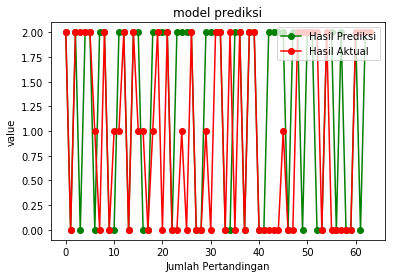

In [71]:
plt.plot(hasil_prediksi, "o-",color="g")
plt.plot(target_prediksi, "o-",color="r")
plt.title('model prediksi')
plt.ylabel('value')
plt.xlabel('Jumlah Pertandingan')
plt.legend(['Hasil Prediksi','Hasil Aktual'], loc='upper right')
plt.show()

In [72]:
gabungan = pd.read_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_test/gabunga.csv")
gabungan=pd.concat([gabungan,model_pred],axis=1)
gabungan=pd.concat([gabungan,target],axis=1)
gabungan=pd.concat([gabungan,tampan2],axis=1)

In [73]:
gabungan.to_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_test/final.csv")